<a href="https://colab.research.google.com/github/yiboxu20/MachineLearning/blob/main/Resources/Module1/Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Gradient Descent

$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$


<b>Stochastic Gradient Descent (SGD)</b>, a simple modification applied to the <b>gradient descent</b> algorithm. SGD also computes the gradient but updates the weight matrix $\m{W}$ on small batches of training data, instead of the entire training set itself.

While this leads to “noiser” weight updates, it also allows us to take more steps along the gradient (1 step for each batch vs. 1 step per epoch), ultimately leading to faster convergence and no negative affects to loss and classification accuracy.

Here is a quick <u>comparison table</u> between Stochastic Gradient Descent and gradient descent:

| Algorithm | Time per iter | Total time to convergence<br>for large data in theory | Total time to convergence<br>for large data in practice | Sensitivity to params |
|------------------------|---------------------|-------------------------------------------------------|---------------------------------------------------------|-----------------------|
| Gradient<br>Descent | Slow for large data | Slower | Usually slower | Moderate |
| Stochastic<br>Gradient | Always fast | Faster | Usually faster | Very high |

Now, let's consider an example where we illustrate the use of stochastic gradient descent for linear regression.

Our goal is to find the equation of the straight line $h_\theta(x) = \theta_0 + \theta_1 x$ that best fits our data points. The function that we are trying to minimize in this case is:

$J(\theta_0,\theta_1) = {1 \over 2m} \sum\limits_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2$

In this case, our gradient will be defined in two dimensions:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x^{(i)})-y^{(i)}) \cdot x^{(i)})$


Here is the stochastic gradient descent algorithm for simple linear regression, where $N$ is the size of the data set:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Randomly shuffle the data set <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> $k = 0, 1, 2, \dots$ <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>for</b> $i = 1$ to $N$ <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\begin{bmatrix}
 \theta_0 \\
 \theta_1 \\
 \end{bmatrix}=\begin{bmatrix}
 \theta_0 \\
 \theta_1 \\
 \end{bmatrix}-\alpha\begin{bmatrix}
 2(h_\theta(x^{(i)})-y^{(i)}) \\
 2x^{(i)}(h_\theta(x^{(i)})-y^{(i)}) \\
 \end{bmatrix}$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>end for</b> <br>
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

Typically, with stochastic gradient descent, you will run through the entire data set 1 to 10 times (see value for $k$ in line 2 of the pseudocode above), depending on how fast the data is converging and how large the data set is.

In the example below, we'll create a set of 50,000 points around the line $𝑦 = 7+ 3𝑥 + \epsilon$ , for values of $x$ between 0 and 100:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

f = lambda x: 7 + x * 3 + np.random.randn(len(x)) * 10
x = np.random.random(50000) * 100
y = f(x)
m = len(y)
batch = 100 # batch size

First, let's randomly shuffle around our dataset. Note that in this example, this step isn't strictly necessary since the data is already in a random order. However, that obviously may not always be the case:

Now we'll setup our h function and our cost function, which we will use to check how the value is improving.

In [3]:
h = lambda theta_0, theta_1, x: theta_0 + theta_1 * x
cost = lambda theta_0, theta_1, x_i, y_i: 0.5 * (h(theta_0, theta_1, x_i) - y_i) ** 2

Now we'll run our stochastic gradient descent algorithm. To see it's progress, we'll take a cost measurement at every step. Every 10,000 steps, we'll get an average cost from the last 10,000 steps and then append that to our cost_list variable. We will run through the entire list 10 times here:

In [9]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
lr = 0.00005 # learning rate
batch = 1 # batch size

iter_num = 0
s_k = np.array([float("inf"), float("inf")])
sum_cost = 0
cost_list = []

for i in range(m * 10):
    iter_num += 1
    # random choice of matching x and y
    idx = np.random.randint(0, m, size=batch)
    x_i = x[idx]  # random choice of x
    y_i = y[idx]  # random choice of y

    theta_old = theta_new
    pred_y = h(theta_old[0], theta_old[1], x_i)
    s_k[0] = pred_y - y_i
    s_k[1] = (pred_y - y_i) * x_i
    s_k = (-1) * s_k
    theta_new = theta_old + lr * s_k

    # saved for plot
    sum_cost += cost(theta_old[0], theta_old[1], x_i, y_i)
    if (i + 1) % 10000 == 0:
        cost_list.append(sum_cost / 10000.0)
        sum_cost = 0

print("Local minimum occurs where:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])

/tmp/ipython-input-136043232.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s_k[0] = pred_y - y_i
/tmp/ipython-input-136043232.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s_k[1] = (pred_y - y_i) * x_i


Local minimum occurs where:
theta_0 = 7.124158695583473
theta_1 = 2.9593500182342574


As you can see, our values for $\theta_0$ and $\theta_1$ are close to their true values of 7 and 3.

Now, we plot our cost versus the number of iterations. As you can see, the cost goes down quickly at first, but starts to level off as we go through more iterations:

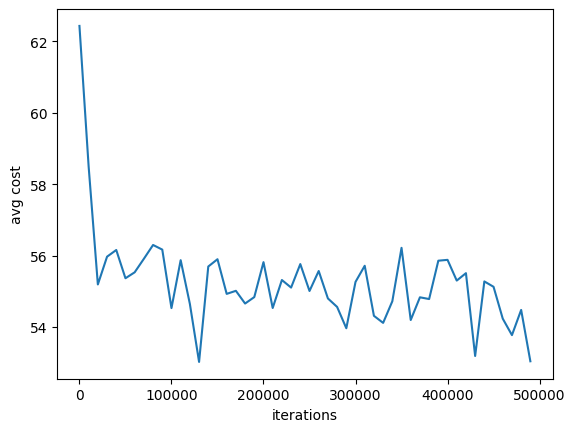

In [8]:
iterations = np.arange(len(cost_list)) * 10000
plt.plot(iterations,cost_list)
plt.xlabel("iterations")
plt.ylabel("avg cost")
plt.show()

Well, that was kind of cool, but I wish that I didn't need to calculate the gradients myself before I can apply gradient descent or stochastic gradient descent. I wonder if there is some tool that can do that for whichever functions that I am interested in... <b>Pytorch</b> comes to help!
